# Customer Churn Prediction

## Introductory Remarks

**Churn prediction** is the task of identifying whether users are likely to stop using a service, product, or website. Companies and large corprorations strive to aqcuire new customers, a process which usually requires a lot of resources in time and money, and they will do everything to prevent a customer from leaving. Acquiring a new customer is often much more costly, rather than making an offer to a client who is ready to leave. More importantly, customers rarely reveal their complaints about a service or a product they use, or their intentions of leaving a company. Therefore, it is important for companies to regularly review historical user behavior patterns and accurately forecast the probability that a given customer may churn.

Furthermore, companies usually make a distinction between **voluntary churn** and **involuntary churn**. **Voluntary churn** occurs due to a decision by the customer to switch to another company or service provider, whereas **involuntary churn** occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn *are excluded* from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

Here, we are going to study the transactional data set which contains all the transactions occurring between December 1st, 2010 (01/12/2010) and December 9th, 2011 (09/12/2011) for a UK-based and registered non-store online retailer. The company mainly sells unique all-occasion gifts. The data set is provided through the [UCI Machine Learning Directory (Online Retail)](http://archive.ics.uci.edu/ml/datasets/Online+Retail), and our task will be to predict which customers are likely to churn given their purchasing activity. We will assume that none of these customers has stopped buying from this online retailer due to involuntary reasons, and that if some of them did was due to their intention to actually leave the company.

It is important to note that **customer churn** can be defined in many ways. In the **GraphLab Create** **`churn_predictor`** toolkit that we are going to use below, **churn** is defined to be no activity for a fixed period of time (called the **`churn_period`**). More specifically, a user is said to have churned if there he/she has no activity for a duration of time known as the **`churn_period`** (by default, this is set to 30 days).

### Data Source / Bibliography

[Chen et. al 2012] Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

Data set has been provided from the UCI ML Repository: http://archive.ics.uci.edu/ml/datasets/Online+Retail

## Libraries and Necessary Data Transformations

First we fire up **GraphLab Create**, all the other necessary libraries, and load the **`Online_Retail.csv`** data set in an **SFrame**.

In [1]:
import graphlab as gl
import graphlab.aggregate as agg
import datetime as dt
from visualization_helper_functions import *

[INFO] graphlab.cython.cy_server: GraphLab Create v1.10.1 started. Logging: /tmp/graphlab_server_1467119493.log
INFO:graphlab.cython.cy_server:GraphLab Create v1.10.1 started. Logging: /tmp/graphlab_server_1467119493.log


This non-commercial license of GraphLab Create is assigned to tgrammat@gmail.com and will expire on September 21, 2016. For commercial licensing options, visit https://dato.com/buy/.


In [2]:
purchasing_data = gl.SFrame.read_csv('./../../04.UCI.ML.REPO/00352.Online_Retail/Online_Retail.csv', 
                                     column_type_hints=[str,str,str,int,str,float,str,str])

Finished parsing file /home/theod/Documents/ML_Home/04.UCI.ML.REPO/00352.Online_Retail/Online_Retail.csv

Parsing completed. Parsed 541909 lines in 6.08615 secs.

As shown below, **`purchasing_data`** keeps the transactional data of purchases made by various customers of this online retailer during the period  from 01/12/2010 to 09/12/2011. It keeps customer records per **`InvoiceNo`** and **`StockCode`**, the **`Quantity`** and the **`UnitPrice`** of each product procured, and the **`InvoiceDate`** that the corresponding invoice has been issued. Customer country of residency, **`Country`**, as well as a short description of each **`StockCode`** is also provided.

In [3]:
purchasing_data.head(5)

Columns:
	InvoiceNo	str
	StockCode	str
	Description	str
	Quantity	int
	InvoiceDate	str
	UnitPrice	float
	CustomerID	str
	Country	str

Rows: 5

Data:
+-----------+-----------+--------------------------------+----------+
| InvoiceNo | StockCode |          Description           | Quantity |
+-----------+-----------+--------------------------------+----------+
|   536365  |   85123A  | WHITE HANGING HEART T-LIGH...  |    6     |
|   536365  |   71053   |      WHITE METAL LANTERN       |    6     |
|   536365  |   84406B  | CREAM CUPID HEARTS COAT HANGER |    8     |
|   536365  |   84029G  | KNITTED UNION FLAG HOT WAT...  |    6     |
|   536365  |   84029E  | RED WOOLLY HOTTIE WHITE HEART. |    6     |
+-----------+-----------+--------------------------------+----------+
+----------------+-----------+------------+----------------+
|  InvoiceDate   | UnitPrice | CustomerID |    Country     |
+----------------+-----------+------------+----------------+
| 12/1/2010 8:26 |    2.55   |   17850    | United Kingdom |
| 12/1/2010 8:26 |    3.39   |   17850    | United Kingdom |
| 12/1/2010 8:26 |    2.75   |   17850    | United Kingdom |
| 12/1/2010 8:26 |    3.39   |   17850    | United Kingdom |
| 12/1/2010 8:26 |    3.39   |   17850    | United Kingdom |
+----------------+-----------+------------+----------------+
[5 rows x 8 columns]

In [4]:
purchasing_data.dtype

<bound method SFrame.dtype of Columns:
	InvoiceNo	str
	StockCode	str
	Description	str
	Quantity	int
	InvoiceDate	str
	UnitPrice	float
	CustomerID	str
	Country	str

Rows: 541909

Data:
+-----------+-----------+--------------------------------+----------+
| InvoiceNo | StockCode |          Description           | Quantity |
+-----------+-----------+--------------------------------+----------+
|   536365  |   85123A  | WHITE HANGING HEART T-LIGH...  |    6     |
|   536365  |   71053   |      WHITE METAL LANTERN       |    6     |
|   536365  |   84406B  | CREAM CUPID HEARTS COAT HANGER |    8     |
|   536365  |   84029G  | KNITTED UNION FLAG HOT WAT...  |    6     |
|   536365  |   84029E  | RED WOOLLY HOTTIE WHITE HEART. |    6     |
|   536365  |   22752   |  SET 7 BABUSHKA NESTING BOXES  |    2     |
|   536365  |   21730   | GLASS STAR FROSTED T-LIGHT...  |    6     |
|   536366  |   22633   |     HAND WARMER UNION JACK     |    6     |
|   536366  |   22632   |   HAND WARMER RED PO

Now we need to convert the **`InvoiceDate`** (which is a string) into a **Python DateTime** object.

In [5]:
def _str_to_datetime(x):
    import datetime as dt
    try:
        return dt.datetime.strptime(x, '%m/%d/%Y %H:%M')
    except (TypeError, ValueError):
        return None

In [6]:
purchasing_data['InvoiceDate'] = purchasing_data['InvoiceDate'].apply(_str_to_datetime)
purchasing_data.head(5)

Columns:
	InvoiceNo	str
	StockCode	str
	Description	str
	Quantity	int
	InvoiceDate	datetime
	UnitPrice	float
	CustomerID	str
	Country	str

Rows: 5

Data:
+-----------+-----------+--------------------------------+----------+
| InvoiceNo | StockCode |          Description           | Quantity |
+-----------+-----------+--------------------------------+----------+
|   536365  |   85123A  | WHITE HANGING HEART T-LIGH...  |    6     |
|   536365  |   71053   |      WHITE METAL LANTERN       |    6     |
|   536365  |   84406B  | CREAM CUPID HEARTS COAT HANGER |    8     |
|   536365  |   84029G  | KNITTED UNION FLAG HOT WAT...  |    6     |
|   536365  |   84029E  | RED WOOLLY HOTTIE WHITE HEART. |    6     |
+-----------+-----------+--------------------------------+----------+
+---------------------+-----------+------------+----------------+
|     InvoiceDate     | UnitPrice | CustomerID |    Country     |
+---------------------+-----------+------------+----------------+
| 2010-12-01 08:26:00 |    2.55   |   17850    | United Kingdom |
| 2010-12-01 08:26:00 |    3.39   |   17850    | United Kingdom |
| 2010-12-01 08:26:00 |    2.75   |   17850    | United Kingdom |
| 2010-12-01 08:26:00 |    3.39   |   17850    | United Kingdom |
| 2010-12-01 08:26:00 |    3.39   |   17850    | United Kingdom |
+---------------------+-----------+------------+----------------+
[5 rows x 8 columns]

### Exploratory data analysis / Data Cleansing

To have a better feeling of the provided data set, we plot a univariate summary statistics as below.

In [7]:
gl.canvas.set_target('ipynb')
purchasing_data.show()

Here, we have used the special **SFrame** functionality, **`.show()`**, to draw this summary statistics. An important advantage of this **GraphLab Create** method is its ability to draw plots of large data sets with unparallel ease. However, for reasons of general compatibility, we utilize below the **`matplotlib`** and **`seaborn`** Python libraries through the **`visuzalization_helper_functions`** which we imported initially, providing that way some basic visualizations to help our discussion.

Note, that not all the features of the **`purchasing_data`** set are usefull for a univariate summary statistics analysis. We have 25900 different values recorded as **`InvoiceNo`** and more than 4000 different **`StockCode`**s and **`CustomerID`**s, all of which are nominal categorical variables. Furthermore, the product **`Description`** can not help by any mean our analysis, whereas it is not meaningful to make a univariate analysis of the datetime field, **`InvoiceDate`**.

In [8]:
purchasing_data_df = purchasing_data.to_dataframe()
print purchasing_data_df.describe(include='all')

       InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              541909  541909.000000   
unique     25900      4070                                4212            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
first        NaN       NaN                                 NaN            NaN   
last         NaN       NaN                                 NaN            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN  

So by excluding from our consideration the attributes **`Description`** and **`InvoiceNo`** and keeping aside the **`StockCode`** and **`CustomerID`** which we will draw in separate frequency plots later, the univariate summary statistics of the remaining features can be visualized as follows.

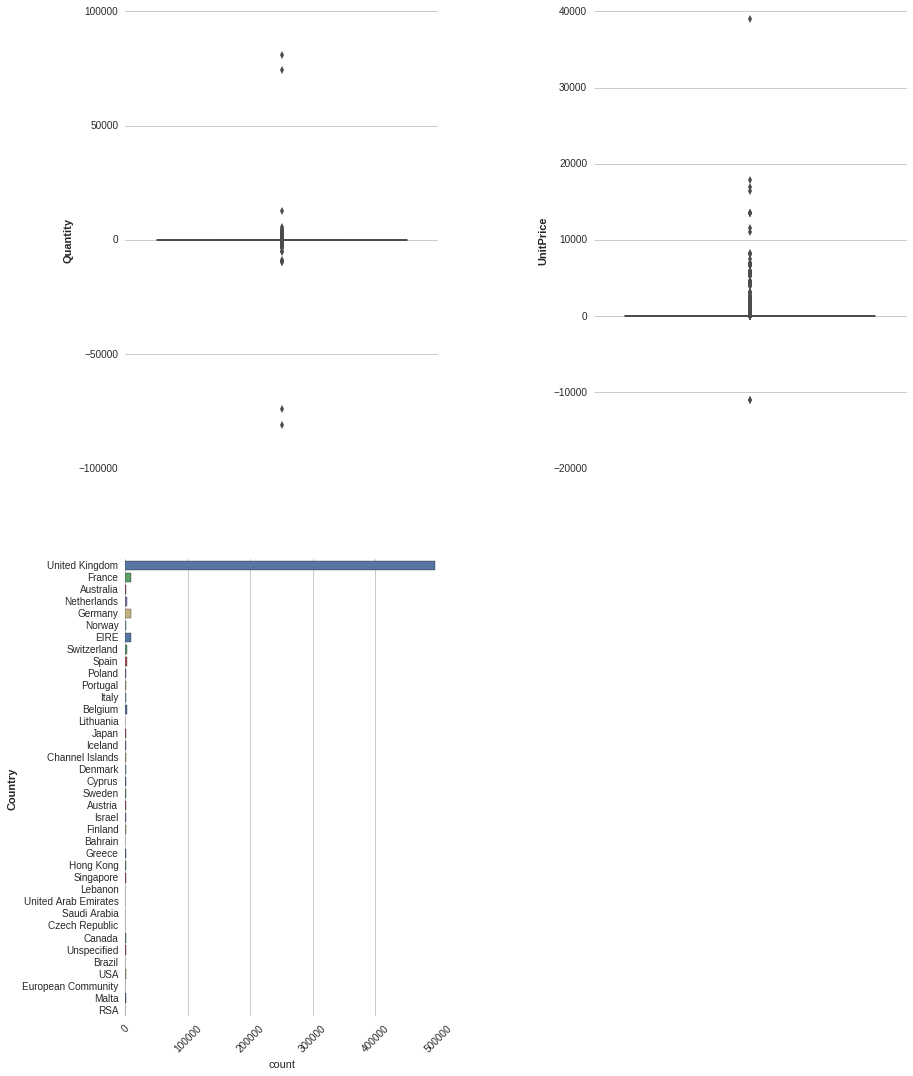


Univariate Summary Statistics:

             Quantity      UnitPrice         Country
count   541909.000000  541909.000000          541909
unique            NaN            NaN              38
top               NaN            NaN  United Kingdom
freq              NaN            NaN          495478
mean         9.552250       4.611114             NaN
std        218.081158      96.759853             NaN
min     -80995.000000  -11062.060000             NaN
25%          1.000000       1.250000             NaN
50%          3.000000       2.080000             NaN
75%         10.000000       4.130000             NaN
max      80995.000000   38970.000000             NaN


In [10]:
%matplotlib inline
univariate_summary_statistics_plot(purchasing_data, 
                                   ['Quantity','UnitPrice', 'Country'],
                                   nsubplots_inrow=2, subplots_wspace=0.5)

In [11]:
gl.Sketch(purchasing_data['CustomerID'])


+------------------+--------+----------+
|       item       | value  | is exact |
+------------------+--------+----------+
|      Length      | 541909 |   Yes    |
| # Missing Values |   0    |   Yes    |
| # unique values  |  4361  |    No    |
+------------------+--------+----------+

Most frequent items:
+-------+--------+-------+-------+-------+-------+-------+-------+-------+-------+
| value |   X2   | 17841 | 14911 | 14096 | 12748 | 14606 | 15311 | 14646 | 13089 |
+-------+--------+-------+-------+-------+-------+-------+-------+-------+-------+
| count | 135080 |  7983 |  5903 |  5128 |  4642 |  2782 |  2491 |  2085 |  1857 |
+-------+--------+-------+-------+-------+-------+-------+-------+-------+-------+
+-------+
| 13263 |
+-------+
|  1677 |
+-------+


In [12]:
gl.Sketch(purchasing_data['StockCode'])


+------------------+--------+----------+
|       item       | value  | is exact |
+------------------+--------+----------+
|      Length      | 541909 |   Yes    |
| # Missing Values |   0    |   Yes    |
| # unique values  |  4086  |    No    |
+------------------+--------+----------+

Most frequent items:
+-------+--------+-------+--------+-------+-------+-------+-------+-------+-------+
| value | 85123A | 22423 | 85099B | 47566 | 20725 | 84879 | 22720 | 22197 | 21212 |
+-------+--------+-------+--------+-------+-------+-------+-------+-------+-------+
| count |  2313  |  2203 |  2159  |  1727 |  1639 |  1502 |  1477 |  1476 |  1385 |
+-------+--------+-------+--------+-------+-------+-------+-------+-------+-------+
+-------+
| 20727 |
+-------+
|  1350 |
+-------+


Note that some values seems peculiar in this data set. First, some records have negative **`Quantity`** and **`UnitPrice`** values, whereas a large number of **`CustomerID`**s are missing. We have more than 135000 such occurences (anonymous **`'X2'`** values) in the corresponding **`gl.Sketch()`** above. However, since we want to predict which customers are likely to churn, record lines with missing **`CustomerID`**s can not help our model and we should better exclude them. The **`purchasing_data`** set now becomes.

In [13]:
purchasing_data = purchasing_data[purchasing_data['CustomerID']!='']
purchasing_data.show()

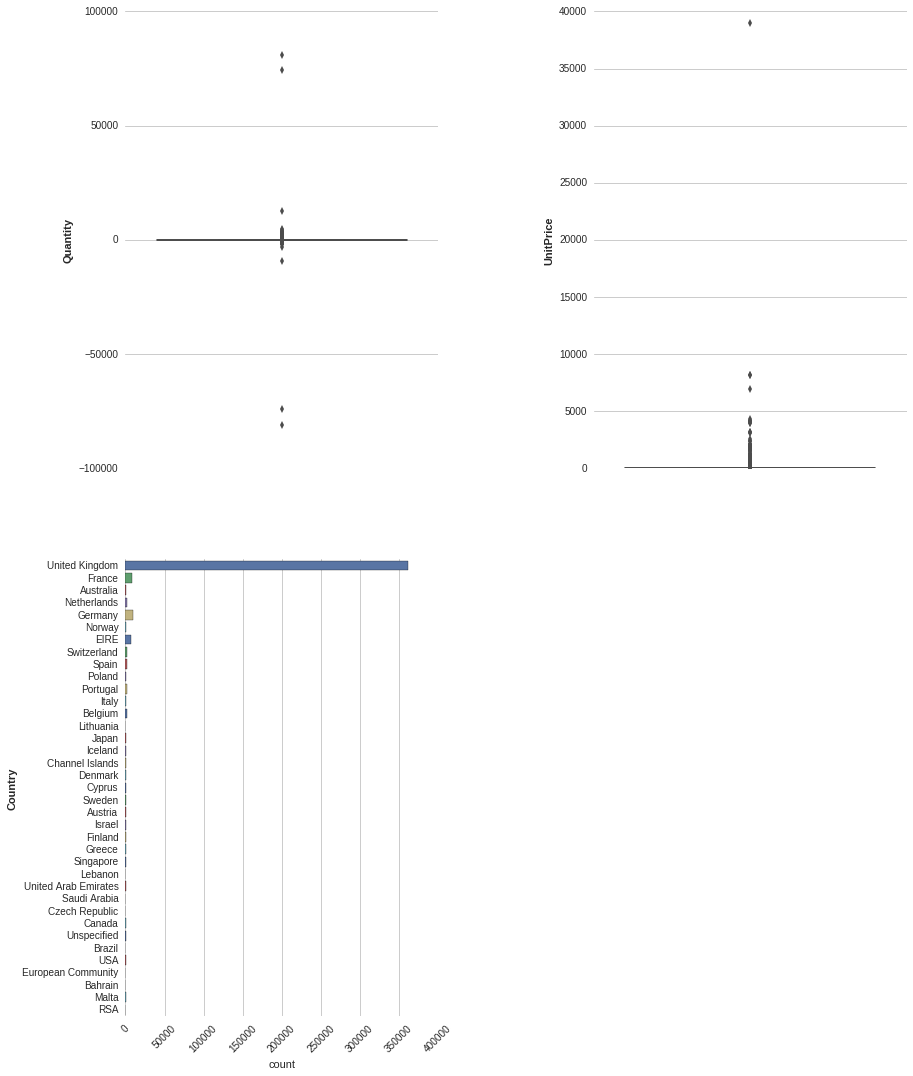


Univariate Summary Statistics:

             Quantity      UnitPrice         Country
count   406829.000000  406829.000000          406829
unique            NaN            NaN              37
top               NaN            NaN  United Kingdom
freq              NaN            NaN          361878
mean        12.061303       3.460471             NaN
std        248.693370      69.315162             NaN
min     -80995.000000       0.000000             NaN
25%          2.000000       1.250000             NaN
50%          5.000000       1.950000             NaN
75%         12.000000       3.750000             NaN
max      80995.000000   38970.000000             NaN


In [14]:
%matplotlib inline
univariate_summary_statistics_plot(purchasing_data, 
                                   ['Quantity','UnitPrice', 'Country'],
                                   nsubplots_inrow=2, subplots_wspace=0.5)

Note, that no negative values in the **`UnitPrice`** attribute exist any more, and except of some incredible expensive outliers, everything looks much more reasonable now.

In [16]:
gl.Sketch(purchasing_data['UnitPrice'])


+--------------------+---------------+----------+
|        item        |     value     | is exact |
+--------------------+---------------+----------+
|       Length       |     406829    |   Yes    |
|        Min         |      0.0      |   Yes    |
|        Max         |    38970.0    |   Yes    |
|        Mean        | 3.46047101854 |   Yes    |
|        Sum         |  1407819.964  |   Yes    |
|      Variance      | 4804.57983486 |   Yes    |
| Standard Deviation | 69.3150765336 |   Yes    |
|  # Missing Values  |       0       |   Yes    |
|  # unique values   |      621      |    No    |
+--------------------+---------------+----------+

Most frequent items:
+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| value |  1.25 |  1.65 |  2.95 |  0.85 |  0.42 |  4.95 |  3.75 |  2.1  |  2.08 |
+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| count | 46555 | 37503 | 27211 | 26396 | 22032 | 18654 | 18091 | 17472 | 15945 |

Note also that beyond the 99% quantile most of the transactions are some manual cancellations [**Credit Notes (C-prefixed Invoices)** with *negative values* in the **`Quantity`** field] and the remaining ones some expensive products. Therefore, we should better keep all these records despite being outliers.

In [17]:
unit_price_outliers = purchasing_data[purchasing_data['UnitPrice'] > 15.95]
unit_price_outliers.sort('UnitPrice', ascending=False)

Columns:
	InvoiceNo	str
	StockCode	str
	Description	str
	Quantity	int
	InvoiceDate	datetime
	UnitPrice	float
	CustomerID	str
	Country	str

Rows: 3651

Data:
+-----------+-----------+-------------+----------+---------------------+-----------+
| InvoiceNo | StockCode | Description | Quantity |     InvoiceDate     | UnitPrice |
+-----------+-----------+-------------+----------+---------------------+-----------+
|  C556445  |     M     |    Manual   |    -1    | 2011-06-10 15:31:00 |  38970.0  |
|  C551685  |    POST   |   POSTAGE   |    -1    | 2011-05-03 12:51:00 |  8142.75  |
|   551697  |    POST   |   POSTAGE   |    1     | 2011-05-03 13:46:00 |  8142.75  |
|  C551699  |     M     |    Manual   |    -1    | 2011-05-03 14:12:00 |   6930.0  |
|  C560372  |     M     |    Manual   |    -1    | 2011-07-18 12:26:00 |  4287.63  |
|  C573079  |     M     |    Manual   |    -2    | 2011-10-27 14:15:00 |  4161.06  |
|   573080  |     M     |    Manual   |    1     | 2011-10-27 14:20:00 |  4161.06  |
|   573077  |     M     |    Manual   |    1     | 2011-10-27 14:13:00 |  4161.06  |
|   571751  |     M     |    Manual   |    1     | 2011-10-19 11:18:00 |  3949.32  |
|  C571750  |     M     |    Manual   |    -1    | 2011-10-19 11:16:00 |  3949.32  |
+-----------+-----------+-------------+----------+---------------------+-----------+
+------------+----------------+
| CustomerID |    Country     |
+------------+----------------+
|   15098    | United Kingdom |
|   16029    | United Kingdom |
|   16029    | United Kingdom |
|   16029    | United Kingdom |
|   17448    | United Kingdom |
|   12536    |     France     |
|   12536    |     France     |
|   12536    |     France     |
|   12744    |   Singapore    |
|   12744    |   Singapore    |
+------------+----------------+
[3651 rows x 8 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

For completeness, the **`UnitPrice`** distribution beyond the 99% quantile is as follows:

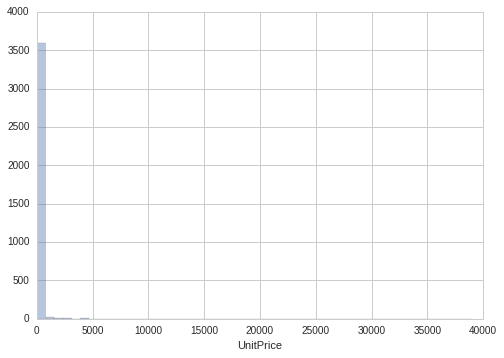

In [18]:
%matplotlib inline

# transform the SFrame of interest into a Pandas DataFrame
unit_price_outliers_df = unit_price_outliers.to_dataframe()

# define seaborn style, palette, color codes
sns.set(style="whitegrid", palette="deep",color_codes=True)

# draw the UnitPrice distplot
ax = sns.distplot(unit_price_outliers_df.UnitPrice,
                  bins=None, hist=True, kde=False, rug=False, color='b')

or zooming into the `(15.95, 500]` **`UnitPrice`** interval:

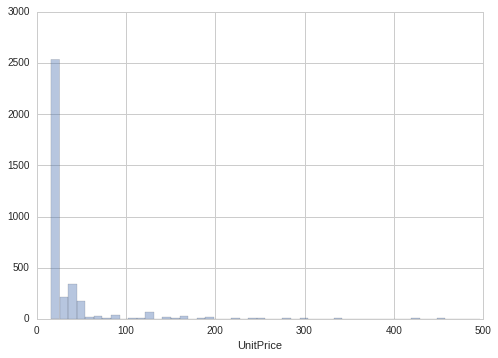

In [19]:
%matplotlib inline
# define seaborn style, palette, color codes
sns.set(style="whitegrid", palette="deep",color_codes=True)

# draw the UnitPrice distplot
ax = sns.distplot(unit_price_outliers_df[unit_price_outliers_df['UnitPrice']<500].UnitPrice,\
                  bins=None, hist=True, kde=False, rug=False, color='b')

Furthermore, taking a closer look in the part of the record with the negative procured **Quantities**, we can safely assume that these cases concern **product returns**, **discounts (`StockCode='D'`)** and **manual corrections (`StockCode='M'`)**. Therefore, having  a complete purchasing record per customer requires keeping all these transactions.

In [20]:
purchasing_data_neg_quantity = purchasing_data[purchasing_data['Quantity'] < 0]
purchasing_data_neg_quantity.show()

In [21]:
gl.Sketch(purchasing_data_neg_quantity['Quantity'])


+--------------------+----------------+----------+
|        item        |     value      | is exact |
+--------------------+----------------+----------+
|       Length       |      8905      |   Yes    |
|        Min         |    -80995.0    |   Yes    |
|        Max         |      -1.0      |   Yes    |
|        Mean        | -30.8599663111 |   Yes    |
|        Sum         |   -274808.0    |   Yes    |
|      Variance      | 1369108.81711  |   Yes    |
| Standard Deviation | 1170.08923468  |   Yes    |
|  # Missing Values  |       0        |   Yes    |
|  # unique values   |      134       |    No    |
+--------------------+----------------+----------+

Most frequent items:
+-------+------+------+-----+-----+-----+-----+-----+-----+-----+-----+
| value |  -1  |  -2  |  -3 | -12 |  -6 |  -4 | -24 |  -5 | -10 |  -8 |
+-------+------+------+-----+-----+-----+-----+-----+-----+-----+-----+
| count | 3848 | 1329 | 577 | 520 | 468 | 455 | 236 | 186 | 164 | 143 |
+-------+------+------+---

Indeed, the customer with **`CustomerID='12607'`** procured a bunch of various products on 10/10/2011 at a total cost of $1579.51 and returned all of them back canceling the previously issued Invoice (**`InvoiceNo='570467'`**) two days later. Note the **`'C'`** prefix in the **`InvoiceNo`** of the Credit Note. Of course, this specific customer is unlikely to make another purchase, a fact that we will miss if we drop the lines of product returns. More importantly, we need to take seriously this event of complete purchase cancellation by updating appropriately the predictive model we will build.

In [22]:
purchasing_data_cust_12607 = purchasing_data.filter_by('12607', 'CustomerID')
purchasing_data_cust_12607[['InvoiceNo', 'StockCode', 'Description', 'Quantity',\
                            'InvoiceDate']].\
print_rows(num_rows=205, max_column_width=20)

+-----------+-----------+---------------------+----------+---------------------+
| InvoiceNo | StockCode |     Description     | Quantity |     InvoiceDate     |
+-----------+-----------+---------------------+----------+---------------------+
|   570467  |   22551   | PLASTERS IN TIN ... |    12    | 2011-10-10 16:06:00 |
|   570467  |   21915   | RED  HARMONICA I... |    12    | 2011-10-10 16:06:00 |
|   570467  |   22619   | SET OF 6 SOLDIER... |    4     | 2011-10-10 16:06:00 |
|   570467  |   22138   | BAKING SET 9 PIE... |    3     | 2011-10-10 16:06:00 |
|   570467  |   21524   | DOORMAT SPOTTY H... |    2     | 2011-10-10 16:06:00 |
|   570467  |   21668   | RED STRIPE CERAM... |    12    | 2011-10-10 16:06:00 |
|   570467  |   21671   | RED SPOT CERAMIC... |    12    | 2011-10-10 16:06:00 |
|   570467  |   21669   | BLUE STRIPE CERA... |    12    | 2011-10-10 16:06:00 |
|   570467  |   22090   | PAPER BUNTING RE... |    6     | 2011-10-10 16:06:00 |
|   570467  |   22668   |  P

In [23]:
purchasing_data_cust_12607['CostPerStockCode'] =\
purchasing_data_cust_12607['Quantity'] * purchasing_data_cust_12607['UnitPrice']

purchasing_data_cust_12607.groupby(key_columns = ['InvoiceNo', 'InvoiceDate', 'CustomerID'],
                                   operations = {'Total Cost of Invoice':\
                                                 agg.SUM('CostPerStockCode')}).sort('InvoiceDate')

Columns:
	CustomerID	str
	InvoiceDate	datetime
	InvoiceNo	str
	Total Cost of Invoice	float

Rows: 2

Data:
+------------+---------------------+-----------+-----------------------+
| CustomerID |     InvoiceDate     | InvoiceNo | Total Cost of Invoice |
+------------+---------------------+-----------+-----------------------+
|   12607    | 2011-10-10 16:06:00 |   570467  |        1579.51        |
|   12607    | 2011-10-12 16:17:00 |  C570867  |        -1579.51       |
+------------+---------------------+-----------+-----------------------+
[2 rows x 4 columns]

As another example, the customer with **`CustomerID='18139'`** made a series of purchases on 11/21/2011 and the day after, 11/22/2011, at a total cost of $8393.22. Note, that among the issued invoices two of them (with **`InvoiceNo`** **`'C578073'`** and **`'C578076'`**) involved manual correction (**`StockCode='M'`**) of the paid amount. These kind of transactions may be also important to achieve better predictive performance.

In [24]:
purchasing_data_cust_18139 = purchasing_data.filter_by('18139', 'CustomerID')
purchasing_data_cust_18139['CostPerStockCode'] =\
purchasing_data_cust_18139['Quantity'] * purchasing_data_cust_18139['UnitPrice']
purchasing_data_cust_18139[['InvoiceNo', 'StockCode', 'Description', 'Quantity',\
                            'InvoiceDate']].\
print_rows(num_rows=170, max_column_width=20)

+-----------+-----------+----------------------+----------+---------------------+
| InvoiceNo | StockCode |     Description      | Quantity |     InvoiceDate     |
+-----------+-----------+----------------------+----------+---------------------+
|   577745  |   22087   | PAPER BUNTING WH...  |    40    | 2011-11-21 14:06:00 |
|   577745  |   22046   | TEA PARTY  WRAPP...  |    25    | 2011-11-21 14:06:00 |
|   577745  |   22708   |   WRAP DOLLY GIRL    |    25    | 2011-11-21 14:06:00 |
|   577745  |   23546   |  WRAP PAISLEY PARK   |    25    | 2011-11-21 14:06:00 |
|   577745  |   23230   | WRAP ALPHABET DESIGN |    25    | 2011-11-21 14:06:00 |
|   577745  |   23296   | SET OF 6 TEA TIM...  |    24    | 2011-11-21 14:06:00 |
|   577745  |   21210   | SET OF 72 RETROS...  |    24    | 2011-11-21 14:06:00 |
|   577745  |   84991   | 60 TEATIME FAIRY...  |    24    | 2011-11-21 14:06:00 |
|   577745  |   21977   | PACK OF 60 PINK ...  |    24    | 2011-11-21 14:06:00 |
|   577745  |   

In [25]:
purchasing_data_cust_18139['CostPerStockCode'] =\
purchasing_data_cust_18139['Quantity'] * purchasing_data_cust_18139['UnitPrice']

purchasing_data_cust_18139.groupby(key_columns = ['InvoiceNo', 'InvoiceDate', 'CustomerID'],
                                   operations = {'Total Cost of Invoice':\
                                                 agg.SUM('CostPerStockCode')}).sort('InvoiceDate')

Columns:
	CustomerID	str
	InvoiceDate	datetime
	InvoiceNo	str
	Total Cost of Invoice	float

Rows: 8

Data:
+------------+---------------------+-----------+-----------------------+
| CustomerID |     InvoiceDate     | InvoiceNo | Total Cost of Invoice |
+------------+---------------------+-----------+-----------------------+
|   18139    | 2011-11-21 14:06:00 |   577745  |         461.4         |
|   18139    | 2011-11-21 14:47:00 |   577754  |        2675.28        |
|   18139    | 2011-11-21 15:53:00 |   577772  |         689.52        |
|   18139    | 2011-11-21 16:20:00 |   577783  |         2786.4        |
|   18139    | 2011-11-22 09:17:00 |   577816  |        1090.92        |
|   18139    | 2011-11-22 10:44:00 |   577845  |         734.82        |
|   18139    | 2011-11-22 16:02:00 |  C578073  |         -31.68        |
|   18139    | 2011-11-22 16:18:00 |  C578076  |         -13.44        |
+------------+---------------------+-----------+-----------------------+
[8 rows x 4 columns]

In [26]:
purchasing_data_cust_18139.groupby(key_columns = 'CustomerID',
                                   operations = {'Total Cost of Invoice':\
                                                 agg.SUM('CostPerStockCode')})

Columns:
	CustomerID	str
	Total Cost of Invoice	float

Rows: 1

Data:
+------------+-----------------------+
| CustomerID | Total Cost of Invoice |
+------------+-----------------------+
|   18139    |        8393.22        |
+------------+-----------------------+
[1 rows x 2 columns]

### Data Preparation for Model Training & train/test split

In this section, we are going to further prepare the **`purchasing_data`** set for the **Churn Predictor model** we are going to train.

In [27]:
purchasing_data.print_rows(num_rows=10, max_column_width=20)

+-----------+-----------+---------------------+----------+---------------------+
| InvoiceNo | StockCode |     Description     | Quantity |     InvoiceDate     |
+-----------+-----------+---------------------+----------+---------------------+
|   536365  |   85123A  | WHITE HANGING HE... |    6     | 2010-12-01 08:26:00 |
|   536365  |   71053   | WHITE METAL LANTERN |    6     | 2010-12-01 08:26:00 |
|   536365  |   84406B  | CREAM CUPID HEAR... |    8     | 2010-12-01 08:26:00 |
|   536365  |   84029G  | KNITTED UNION FL... |    6     | 2010-12-01 08:26:00 |
|   536365  |   84029E  | RED WOOLLY HOTTI... |    6     | 2010-12-01 08:26:00 |
|   536365  |   22752   | SET 7 BABUSHKA N... |    2     | 2010-12-01 08:26:00 |
|   536365  |   21730   | GLASS STAR FROST... |    6     | 2010-12-01 08:26:00 |
|   536366  |   22633   | HAND WARMER UNIO... |    6     | 2010-12-01 08:28:00 |
|   536366  |   22632   | HAND WARMER RED ... |    6     | 2010-12-01 08:28:00 |
|   536367  |   84879   | AS

In [28]:
purchasing_data.show()

Among the available attributes, the **`Description`** column is not going to help the model and should be excluded. Furthermore, the nominal categorical attribute **`InvoiceNo`** has too many different values (more than 22000) to be helpful for the **GraphLab Create `churn_predictor`** toolkit. However, as we saw earlier what is important in the historical purchasing record of a customer is not the specific **`InvoiceNo`** against which he/she procured some goods but the *type* of the *issued invoice*; was it a **Purchase/Standard (Invoice Receipt)** or a **Cancelling Invoice (Credit Note)**? This type in fact determines if an actual purchase happened or a product return, and our learning algorithm does not need to know something more from this specific attribute. Therefore, we should better denote:

* all **Purchase Invoices (Invoice Receipts)** having a 6-digit **`InvoiceNo`** with an **`'IR'`** string and 
* all **Cancelling Invoices (Credit Notes)** having a C-prefixed 6-digit **`InvoiceNo`** with a **`'CN'`** string.

In [29]:
purchasing_data.remove_column('Description')
purchasing_data['InvoiceNo'] = purchasing_data['InvoiceNo'].apply(lambda x: 'CN' if 'C' in x else 'IR')
purchasing_data.print_rows(num_rows=20, max_column_width=20)

+-----------+-----------+----------+---------------------+-----------+------------+
| InvoiceNo | StockCode | Quantity |     InvoiceDate     | UnitPrice | CustomerID |
+-----------+-----------+----------+---------------------+-----------+------------+
|     IR    |   85123A  |    6     | 2010-12-01 08:26:00 |    2.55   |   17850    |
|     IR    |   71053   |    6     | 2010-12-01 08:26:00 |    3.39   |   17850    |
|     IR    |   84406B  |    8     | 2010-12-01 08:26:00 |    2.75   |   17850    |
|     IR    |   84029G  |    6     | 2010-12-01 08:26:00 |    3.39   |   17850    |
|     IR    |   84029E  |    6     | 2010-12-01 08:26:00 |    3.39   |   17850    |
|     IR    |   22752   |    2     | 2010-12-01 08:26:00 |    7.65   |   17850    |
|     IR    |   21730   |    6     | 2010-12-01 08:26:00 |    4.25   |   17850    |
|     IR    |   22633   |    6     | 2010-12-01 08:28:00 |    1.85   |   17850    |
|     IR    |   22632   |    6     | 2010-12-01 08:28:00 |    1.85   |   178

The **`purchasing_data`** set now becomes:

In [30]:
purchasing_data.show()

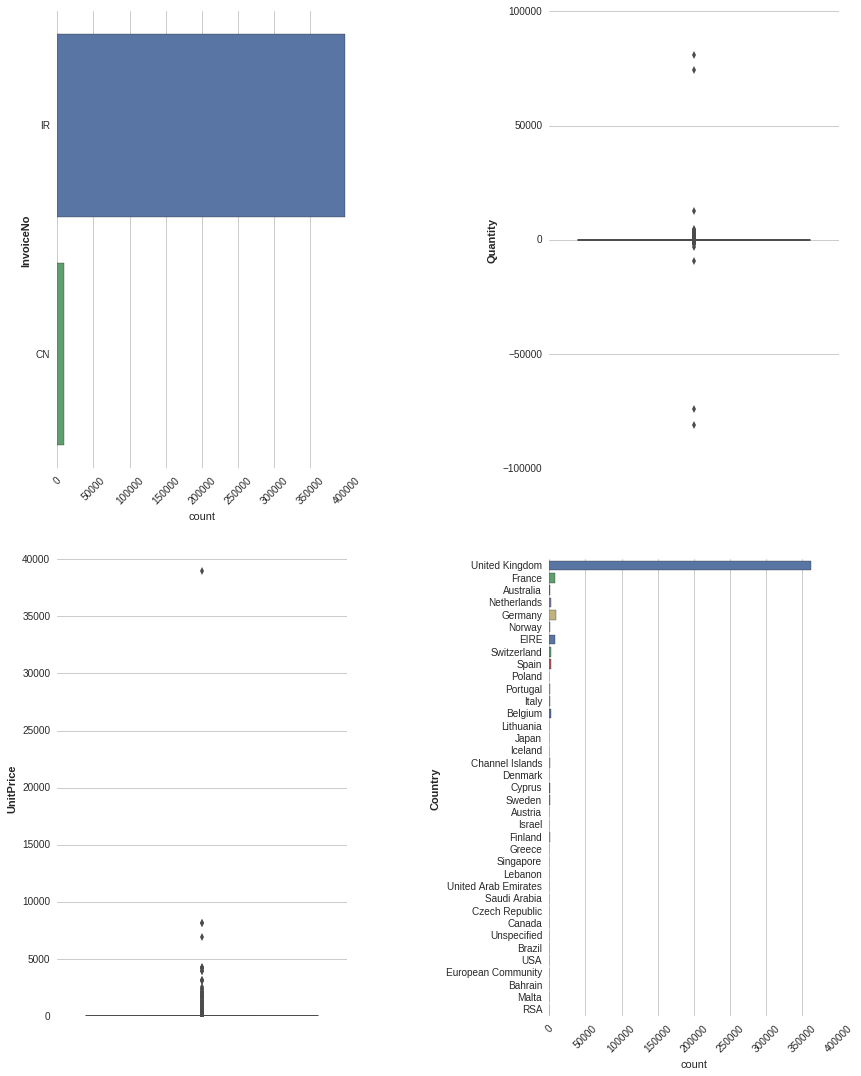


Univariate Summary Statistics:

       InvoiceNo       Quantity      UnitPrice         Country
count     406829  406829.000000  406829.000000          406829
unique         2            NaN            NaN              37
top           IR            NaN            NaN  United Kingdom
freq      397924            NaN            NaN          361878
mean         NaN      12.061303       3.460471             NaN
std          NaN     248.693370      69.315162             NaN
min          NaN  -80995.000000       0.000000             NaN
25%          NaN       2.000000       1.250000             NaN
50%          NaN       5.000000       1.950000             NaN
75%          NaN      12.000000       3.750000             NaN
max          NaN   80995.000000   38970.000000             NaN


In [31]:
univariate_summary_statistics_plot(purchasing_data, 
                                   ['InvoiceNo','Quantity','UnitPrice','Country'],
                                   nsubplots_inrow=2,
                                   subplots_wspace=0.7)

In [32]:
purchasing_data.dtype

<bound method SFrame.dtype of Columns:
	InvoiceNo	str
	StockCode	str
	Quantity	int
	InvoiceDate	datetime
	UnitPrice	float
	CustomerID	str
	Country	str

Rows: 406829

Data:
+-----------+-----------+----------+---------------------+-----------+------------+
| InvoiceNo | StockCode | Quantity |     InvoiceDate     | UnitPrice | CustomerID |
+-----------+-----------+----------+---------------------+-----------+------------+
|     IR    |   85123A  |    6     | 2010-12-01 08:26:00 |    2.55   |   17850    |
|     IR    |   71053   |    6     | 2010-12-01 08:26:00 |    3.39   |   17850    |
|     IR    |   84406B  |    8     | 2010-12-01 08:26:00 |    2.75   |   17850    |
|     IR    |   84029G  |    6     | 2010-12-01 08:26:00 |    3.39   |   17850    |
|     IR    |   84029E  |    6     | 2010-12-01 08:26:00 |    3.39   |   17850    |
|     IR    |   22752   |    2     | 2010-12-01 08:26:00 |    7.65   |   17850    |
|     IR    |   21730   |    6     | 2010-12-01 08:26:00 |    4.25   |  

The frequency plots for the multi-valued, nominal categorical variables, **`CustomerID`**, and **`StockCode`**  are shown below.

Number of Unique Items: 4372
Number of Most Frequent Items, Visualized: 30


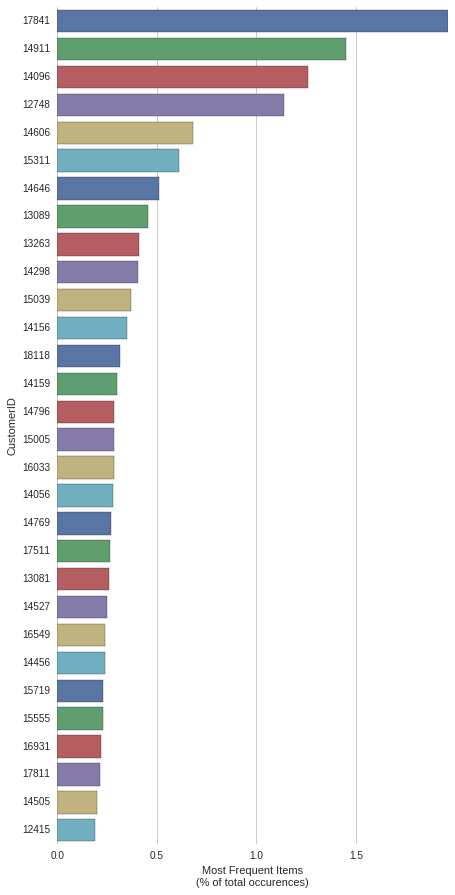

In [33]:
%matplotlib inline
item_freq_plot(purchasing_data, 'CustomerID', topk=30)

Number of Unique Items: 3684
Number of Most Frequent Items, Visualized: 30


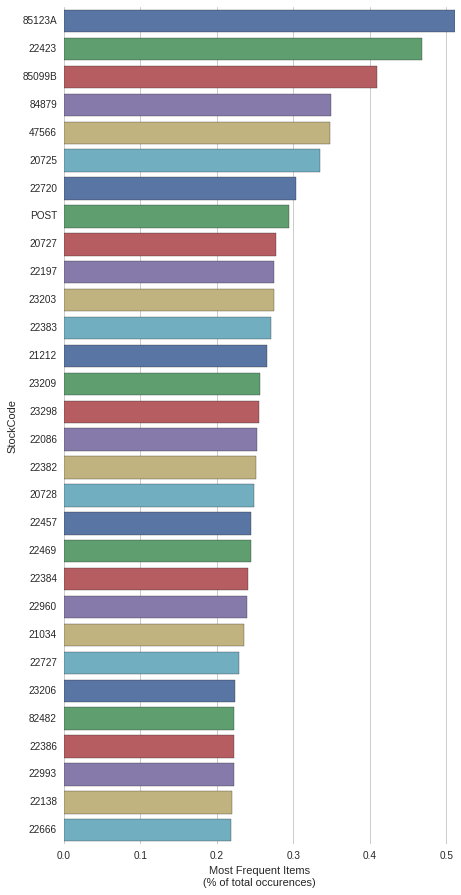

In [34]:
%matplotlib inline
item_freq_plot(purchasing_data, 'StockCode', topk=30)

To better utilize our training set a joint consideration of the two attributes **`InvoiceNo`** and **`StockCode`** would be advisable. This can be achieved by adding an extra derived attribute by concatenating the values of the other two. By doing so we would be able to collectively take in account both the type of the issued Invoice [**Invoice Receipt (`'IR'`)** or **Credit Note(`'CN'`)**], and the specific **`StockCode`** which was procured or returned per record line. However, as it is immediately recognizable below, the percentages of distinct **`StockCode`**s which appeared in the issued **Credit Notes (`'CN'`)**s are particularly low, and the idea of jointly considering **Invoice Types** and **Product Codes** can not help much.

Number of Unique Items: 2012
Number of Most Frequent Items, Visualized: 30


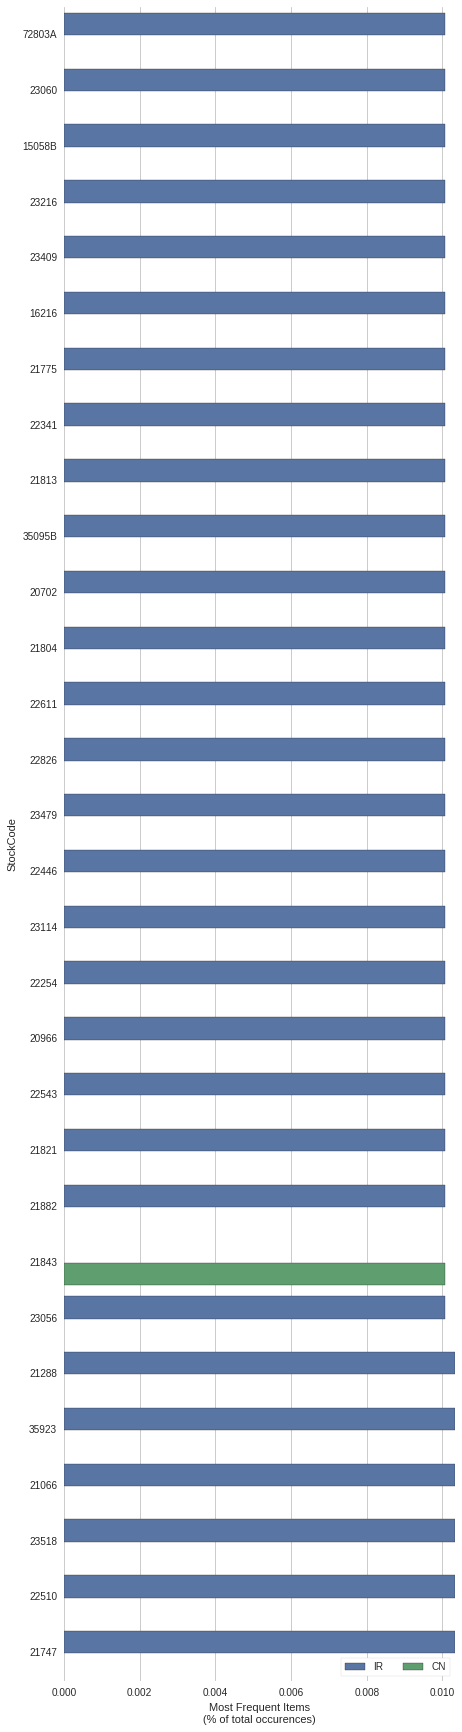

In [35]:
%matplotlib inline
item_freq_plot(purchasing_data, 'StockCode', hue='InvoiceNo', topk=30,
               pct_threshold= 0.01, reverse=True)

In [36]:
purchasing_data_cn = purchasing_data[purchasing_data['InvoiceNo']=='CN']
purchasing_data_cn.groupby(['StockCode','InvoiceNo'], agg.COUNT()).\
sort('Count', ascending=False).print_rows(num_rows=30)

+-----------+-----------+-------+
| InvoiceNo | StockCode | Count |
+-----------+-----------+-------+
|     CN    |   22423   |  181  |
|     CN    |     M     |  175  |
|     CN    |    POST   |   97  |
|     CN    |   22960   |   86  |
|     CN    |     D     |   77  |
|     CN    |   22720   |   73  |
|     CN    |   21232   |   61  |
|     CN    |   22699   |   53  |
|     CN    |   22197   |   50  |
|     CN    |   22666   |   47  |
|     CN    |   82483   |   45  |
|     CN    |   85099B  |   44  |
|     CN    |   22697   |   42  |
|     CN    |   20725   |   42  |
|     CN    |   85123A  |   42  |
|     CN    |   21843   |   41  |
|     CN    |   22776   |   40  |
|     CN    |   21314   |   40  |
|     CN    |   23245   |   37  |
|     CN    |   22698   |   35  |
|     CN    |   84949   |   35  |
|     CN    |   23169   |   34  |
|     CN    |   23243   |   34  |
|     CN    |   20914   |   34  |
|     CN    |   22727   |   33  |
|     CN    |   22456   |   32  |
|     CN    | 

Finally, we want to separate some users into a **train/test set**, making sure the **test users** *are not* in the **training set**, and creating **TimeSeries objects** out of them.

In [37]:
(train, test) = gl.churn_predictor.\
random_split(purchasing_data, user_id='CustomerID', fraction=0.95, seed=1)
train_trial = gl.TimeSeries(train, index='InvoiceDate')
test_trial = gl.TimeSeries(test, index='InvoiceDate')

#### Important Notes:

1. The two parts of **`train/test`** data sets have been splitted in such a way to keep different customers (**`CustomerID`**). This is because we want our learning algorithm to be blind on the data set which we are going to use for its validation and final evaluation.
2. The **test** and **train sets** have identical time ranges, at least as far the calendar dates concern.

In [38]:
# load NumPy Library
import numpy as np

# verify that train and test sets have different CustomerIDs
train_customer_ids = train['CustomerID'].unique().sort().to_numpy()
test_customer_ids = test['CustomerID'].unique().sort().to_numpy()
print 'Number of same \'CustomerID\'s in test and train set: %d' %\
len(test_customer_ids[np.in1d(test_customer_ids, train_customer_ids, assume_unique=True)])

Number of same 'CustomerID's in test and train set: 0


In [39]:
print "Train Start date : %s" % train_trial.min_time
print "Train End date   : %s" % train_trial.max_time

Train Start date : 2010-12-01 08:34:00
Train End date   : 2011-12-09 12:50:00


In [40]:
print "Test Start date : %s" % test_trial.min_time
print "Test End date   : %s" % test_trial.max_time

Test Start date : 2010-12-01 08:26:00
Test End date   : 2011-12-09 12:00:00


### Loading Complementary Customer Information

Now we can load some user information, which can be used to complement the churn prediction model.

In [41]:
userdata = gl.SFrame('./userdata_sf/')
userdata

Columns:
	CustomerID	int
	Gender	str
	Age	int
	Country	str

Rows: 4380

Data:
+------------+--------+-----+----------------+
| CustomerID | Gender | Age |    Country     |
+------------+--------+-----+----------------+
|   13097    |  Male  |  57 | United Kingdom |
|   16817    |  Male  |  57 | United Kingdom |
|   14499    |  Male  |  61 | United Kingdom |
|   16185    |  Male  |  33 | United Kingdom |
|   14285    |  Male  |  33 | United Kingdom |
|   16837    |  Male  |  57 | United Kingdom |
|   13969    |  Male  |  41 | United Kingdom |
|   12831    |  Male  |  45 | United Kingdom |
|   16697    |  Male  |  57 | United Kingdom |
|   17671    |  Male  |  45 | United Kingdom |
+------------+--------+-----+----------------+
[4380 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [42]:
userdata.dtype

<bound method SFrame.dtype of Columns:
	CustomerID	int
	Gender	str
	Age	int
	Country	str

Rows: 4380

Data:
+------------+--------+-----+----------------+
| CustomerID | Gender | Age |    Country     |
+------------+--------+-----+----------------+
|   13097    |  Male  |  57 | United Kingdom |
|   16817    |  Male  |  57 | United Kingdom |
|   14499    |  Male  |  61 | United Kingdom |
|   16185    |  Male  |  33 | United Kingdom |
|   14285    |  Male  |  33 | United Kingdom |
|   16837    |  Male  |  57 | United Kingdom |
|   13969    |  Male  |  41 | United Kingdom |
|   12831    |  Male  |  45 | United Kingdom |
|   16697    |  Male  |  57 | United Kingdom |
|   17671    |  Male  |  45 | United Kingdom |
+------------+--------+-----+----------------+
[4380 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.>

We also change the **`dtype`** of the nominal categorical attribute **`CustomerID`** to **`str`**.

In [43]:
userdata['CustomerID'] = userdata['CustomerID'].astype(str)

## Training the Churn Predictor model

Here, we train the **Churn Predictor** model. We determine the **period of inactivity (`churn_period_trial`)** after which a customer will be considered as churned. Furthermore, in order to extract more signal out of the data, we choose **multiple churn boundaries** for the same users. Remember that both **train** and **test Timeseries** start from 2010-12-01 and end at 2011-12-09.

In [41]:
## churn period of inactivity
churn_period_trial = dt.timedelta(days = 30) 

## In order to extract more signal out of the data, 
## Define multiple churn boundaries for the same users. 
churn_boundary_aug = dt.datetime(year = 2011, month = 8, day = 1) 
churn_boundary_sep = dt.datetime(year = 2011, month = 9, day = 1) 
churn_boundary_oct = dt.datetime(year = 2011, month = 10, day = 1)

In [42]:
train.head(10)

Columns:
	InvoiceNo	str
	StockCode	str
	Description	str
	Quantity	int
	InvoiceDate	datetime
	UnitPrice	float
	CustomerID	str
	Country	str

Rows: 10

Data:
+-----------+-----------+--------------------------------+----------+
| InvoiceNo | StockCode |          Description           | Quantity |
+-----------+-----------+--------------------------------+----------+
|     IR    |   84879   | ASSORTED COLOUR BIRD ORNAMENT  |    32    |
|     IR    |   22745   |   POPPY'S PLAYHOUSE BEDROOM    |    6     |
|     IR    |   22748   |   POPPY'S PLAYHOUSE KITCHEN    |    6     |
|     IR    |   22749   | FELTCRAFT PRINCESS CHARLOT...  |    8     |
|     IR    |   22310   |     IVORY KNITTED MUG COSY     |    6     |
|     IR    |   84969   | BOX OF 6 ASSORTED COLOUR T...  |    6     |
|     IR    |   22623   |  BOX OF VINTAGE JIGSAW BLOCKS  |    3     |
|     IR    |   22622   | BOX OF VINTAGE ALPHABET BLOCKS |    2     |
|     IR    |   21754   |    HOME BUILDING BLOCK WORD    |    3     |
|     IR    |   21755   |    LOVE BUILDING BLOCK WORD    |    3     |
+-----------+-----------+--------------------------------+----------+
+---------------------+-----------+------------+----------------+
|     InvoiceDate     | UnitPrice | CustomerID |    Country     |
+---------------------+-----------+------------+----------------+
| 2010-12-01 08:34:00 |    1.69   |   13047    | United Kingdom |
| 2010-12-01 08:34:00 |    2.1    |   13047    | United Kingdom |
| 2010-12-01 08:34:00 |    2.1    |   13047    | United Kingdom |
| 2010-12-01 08:34:00 |    3.75   |   13047    | United Kingdom |
| 2010-12-01 08:34:00 |    1.65   |   13047    | United Kingdom |
| 2010-12-01 08:34:00 |    4.25   |   13047    | United Kingdom |
| 2010-12-01 08:34:00 |    4.95   |   13047    | United Kingdom |
| 2010-12-01 08:34:00 |    9.95   |   13047    | United Kingdom |
| 2010-12-01 08:34:00 |    5.95   |   13047    | United Kingdom |
| 2010-12-01 08:34:00 |    5.95   |   13047    | United Kingdom |
+---------------------+-----------+------------+----------------+
[10 rows x 8 columns]

In [44]:
## train the Churn Predictor model
model = gl.churn_predictor.create(train_trial,
                                  user_id = 'CustomerID',
                                  features = None,
                                  user_data = userdata,
                                  churn_period = churn_period_trial,
                                  # The time-scale/granularity
                                  # at which features are computed (1 day here)
                                  time_period = dt.timedelta(1),
                                  # The various multiples of `time_period` used
                                  # while computing features
                                  lookback_periods = [7, 14, 21, 60, 90],
                                  # Multiple churn boundaries to extract more signal out of data
                                  time_boundaries = [churn_boundary_aug, churn_boundary_sep,\
                                                     churn_boundary_oct],
                                  use_advanced_features=True)

PROGRESS: Grouping observation_data by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.

Description is a categorical variable with too many different values (3868) and will be ignored.


PROGRESS: Generating features for time-boundary.
PROGRESS: --------------------------------------------------
PROGRESS: Features for 2011-08-01 03:00:00.
PROGRESS: Features for 2011-09-01 03:00:00.
PROGRESS: Features for 2011-10-01 03:00:00.
PROGRESS: Joining user_data with aggregated features.
PROGRESS: --------------------------------------------------
PROGRESS: Training a classifier model.

External memory mode: 1 batches

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 9712

Number of classes           : 2

Number of feature columns   : 28

Number of unpacked features : 2652

Create disk column page 1/1

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 23.548815    | 0.780066          | 0.602425          |

| 2         | 32.300538    | 0.786862          | 0.552385          |

| 3         | 35.532117    | 0.787068          | 0.523186          |

| 4         | 39.152034    | 0.790465          | 0.504794          |

| 5         | 41.990524    | 0.793760          | 0.491921          |

| 6         | 44.443377    | 0.796026          | 0.483503          |

| 7         | 58.203782    | 0.798806          | 0.475561          |

| 8         | 60.465007    | 0.799629          | 0.470561          |

| 9         | 63.175067    | 0.800865          | 0.465407          |

| 10        | 66.092794    | 0.803233          | 0.461569          |

+-----------+--------------+-------------------+-------------------+

External memory mode: 1 batches

External memory mode: 1 batches

Decision tree regression:

--------------------------------------------------------

Number of examples          : 9712

Number of features          : 28

Number of unpacked features : 2652

Create disk column page 1/1

+-----------+--------------+--------------------+---------------+

| Iteration | Elapsed Time | Training-max_error | Training-rmse |

+-----------+--------------+--------------------+---------------+

| 1         | 3.919725     | 0.361340           | 0.204186      |

+-----------+--------------+--------------------+---------------+


PROGRESS: --------------------------------------------------
PROGRESS: Model training complete: Next steps
PROGRESS: --------------------------------------------------
PROGRESS: (1) Evaluate the model at various timestamps in the past:
PROGRESS:       metrics = model.evaluate(data, time_in_past)
PROGRESS: (2) Make a churn forecast for a timestamp in the future:
PROGRESS:       predictions = model.predict(data, time_in_future)


### Evaluating the model (post-hoc anaylsis)

Here, we evaluate the **Churn Predictor `model`**. We choose as **evaluation time**, the last churn boundary which we defined previously.

In [30]:
# Evaluate this model in October
evaluation_time = churn_boundary_oct

In [31]:
# define cutoffs to consider
cutoffs_list = np.linspace(0.1, 1.0, num=100)
cutoffs_list = cutoffs_list.tolist()

# calculate metrics using test set
metrics = model.evaluate(test_trial, evaluation_time,\
                         user_data=userdata, cutoffs=cutoffs_list)

PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2011-10-01 00:00:00
PROGRESS:  End   : 2011-10-31 00:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.

Description is a categorical variable with too many different values (3868) and will be ignored.


PROGRESS: Generating features for boundary 2011-10-01 00:00:00.
PROGRESS: Joining user_data with aggregated features.

External memory mode: 1 batches


PROGRESS: Not enough data to make predictions for 39 user(s). 


In [32]:
print(metrics)

{'auc': 0.7486547365786511, 'recall': 0.9389312977099237, 'precision': 0.7365269461077845, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+-----+-----+-----+----+
| threshold | fpr | tpr |  p  | n  |
+-----------+-----+-----+-----+----+
|    0.0    | 1.0 | 1.0 | 131 | 61 |
|   1e-05   | 1.0 | 1.0 | 131 | 61 |
|   2e-05   | 1.0 | 1.0 | 131 | 61 |
|   3e-05   | 1.0 | 1.0 | 131 | 61 |
|   4e-05   | 1.0 | 1.0 | 131 | 61 |
|   5e-05   | 1.0 | 1.0 | 131 | 61 |
|   6e-05   | 1.0 | 1.0 | 131 | 61 |
|   7e-05   | 1.0 | 1.0 | 131 | 61 |
|   8e-05   | 1.0 | 1.0 | 131 | 61 |
|   9e-05   | 1.0 | 1.0 | 131 | 61 |
+-----------+-----+-----+-----+----+
[100001 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'evaluation_data': Columns:
	CustomerID	str
	probability	float
	label	int

Rows: 192

Data:
+------------+----------------+-------+
| Custom

In [33]:
def plot_pr_curve(precision, recall, title):
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = 7, 5
    plt.plot(precision, recall, 'g-', linewidth=2.0)
    plt.plot(precision, recall, 'bo')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})
    
def plot_roc_curve(fpr, tpr, title):
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = 7, 5
    plt.plot(fpr, tpr, 'g-', linewidth=2.0)
    plt.title(title)
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.rcParams.update({'font.size': 16})

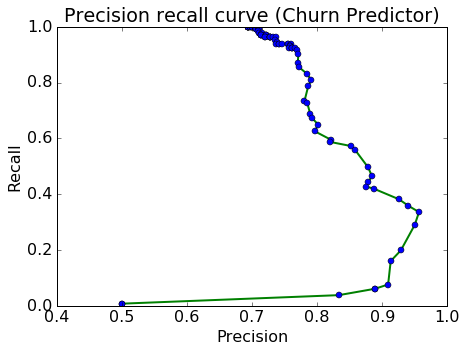

In [34]:
%matplotlib inline

precision_all = metrics['precision_recall_curve']['precision']
recall_all = metrics['precision_recall_curve']['recall']
plot_pr_curve(precision_all, recall_all, 'Precision recall curve (Churn Predictor)')

AUC: 0.74865


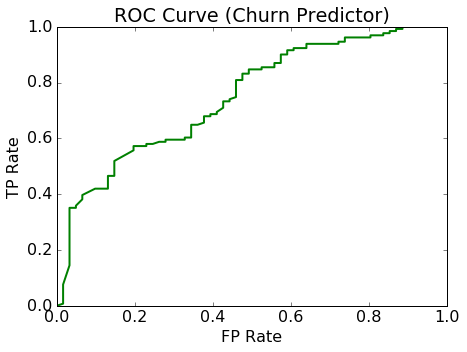

In [35]:
%matplotlib inline

fpr = metrics['roc_curve']['fpr']
tpr = metrics['roc_curve']['tpr']
plot_roc_curve(fpr, tpr, 'ROC Curve (Churn Predictor)')
print 'AUC: %.5f' % metrics['auc']

Of course, there is enough room for improvement if we carefully tweak the hyperparameters of the **boosted trees classifier** which is the underlying classifier of the **GraphLab Create `churn_predictor`** ML toolkit. 

One can even obtain an interactive overview of the trained model as evaluated on the **test set** as shown below. For details, consult [Dato's User Guide for Chrurn Prediction Models](https://dato.com/learn/userguide/churn_prediction/using-a-trained-model.html).

In [36]:
overview = model.views.overview(test_trial, evaluation_time, user_data=userdata)

[WARNING] graphlab.toolkits.churn_predictor._churn_predictor: This feature is currently in beta. Please use with caution and not in mission-critical applications. For feedback or suggestions on this feature, please e-mail feedback@dato.com.


PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2011-10-01 00:00:00
PROGRESS:  End   : 2011-10-31 00:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.

Description is a categorical variable with too many different values (3868) and will be ignored.


PROGRESS: Generating features for boundary 2011-10-01 00:00:00.
PROGRESS: Joining user_data with aggregated features.

External memory mode: 1 batches


PROGRESS: Not enough data to make predictions for 39 user(s). 

External memory mode: 1 batches


PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2011-10-01 00:00:00
PROGRESS:  End   : 2011-10-31 00:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.

Description is a categorical variable with too many different values (3868) and will be ignored.


PROGRESS: Generating features for boundary 2011-10-01 00:00:00.
PROGRESS: Joining user_data with aggregated features.

External memory mode: 1 batches


PROGRESS: Not enough data to make predictions for 39 user(s). 
PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2011-10-01 00:00:00
PROGRESS:  End   : 2011-10-31 00:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.

Description is a categorical variable with too many different values (3868) and will be ignored.


PROGRESS: Generating features for boundary 2011-10-01 00:00:00.
PROGRESS: Joining user_data with aggregated features.
PROGRESS: Not enough data to make predictions for 39 user(s). 


In [37]:
overview.show()

To have a feeling of the outcome of this call, we provide below screen snapshots of both the **Explore** and **Evaluate views** of this interactive feature. In the **Explore view**, one can better investigate how the customers has been clustered in different segments, the corresponding average predicted probability to churn, as well as the reasoning that this might happen for the customers of each segment.

<img src='./model_overview_explore1.png' width='800'/>

In the **Evaluate view** shown below, one can interactively investigate the **Precision** and **Recall** values returned by the model for a given **Churn Probability Threshold** (default value is 50% probability). The application also returns a histogram of percentages of the actual churned users with regard to the predicted ones binned across the whole spectrum of the **Predicted Churn Probability**. Please note that this feature is currently in beta and should be used with caution and not in mission-critical applications.

<img src='./model_overview_evaluate1.png' width='800'/>

## Make predictions in the future

The goal of a **churn prediction model** is to predict the probability that a user has no activity for a **`churn_period`** of time in the future. First, we set a specific time (**`prediction_time`**) at which the predictions must be made. Then we can obtain the desired predictions by calling the **`.predict()`** method of the trained model.

In [38]:
prediction_time = dt.datetime(2011, 9, 1)
predictions = model.predict(test_trial, time_boundary=prediction_time, user_data=userdata)
predictions.print_rows()

PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2011-09-01 00:00:00
PROGRESS:  End   : 2011-10-01 00:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.

Description is a categorical variable with too many different values (3868) and will be ignored.


PROGRESS: Generating features for boundary 2011-09-01 00:00:00.
PROGRESS: Joining user_data with aggregated features.

External memory mode: 1 batches


PROGRESS: Not enough data to make predictions for 60 user(s). 
+------------+-----------------+
| CustomerID |   probability   |
+------------+-----------------+
|   14997    |  0.711190640926 |
|   13211    |  0.889613032341 |
|   13235    |  0.782270908356 |
|   17287    |  0.746277153492 |
|   14213    |  0.889613032341 |
|   17367    |  0.831745862961 |
|   17625    |  0.691181957722 |
|   12427    |  0.941513776779 |
|   13089    | 0.0421136878431 |
|   13291    |  0.67051833868  |
+------------+-----------------+
[231 rows x 2 columns]



To get the 20 most probable customers to churn.

In [39]:
predictions.sort('probability', ascending=False).print_rows(num_rows=20)

+------------+----------------+
| CustomerID |  probability   |
+------------+----------------+
|   15332    | 0.941513776779 |
|   12427    | 0.941513776779 |
|   17324    | 0.921824157238 |
|   12944    | 0.919493913651 |
|   14270    | 0.917038917542 |
|   18106    | 0.89918243885  |
|   17594    | 0.892392218113 |
|   17438    | 0.89202439785  |
|   17855    | 0.889613032341 |
|   15351    | 0.889613032341 |
|   13747    | 0.889613032341 |
|   13369    | 0.889613032341 |
|   15545    | 0.889613032341 |
|   13211    | 0.889613032341 |
|   14150    | 0.889613032341 |
|   17496    | 0.889613032341 |
|   14213    | 0.889613032341 |
|   17701    | 0.888489246368 |
|   17783    | 0.884413003922 |
|   13126    | 0.876144051552 |
+------------+----------------+
[231 rows x 2 columns]



**Note:**

During the predictions process, you may get a message
```
Not enough data to make predictions for 60 user(s).
```
as happens above. This might happen for several reasons. Some of which are:

* The user did not have *any activity* before the **`prediction_time`**.
* The user did not have *any activity* during any of the **`lookback_periods`** (periods of time used during the feature engineering process). The model looks at the usage history in the recent past to make a forecast. If no activity was present during this recent past, then predictions cannot be made. A prediction of **`'None'`** is returned in this case.

### Explaining predictions

One can also obtain explanations about why the model made a specific prediction. This can be obtained by calling the **`.explain()`** method of the trained model as below.

In [40]:
explanations = model.explain(test_trial, time_boundary=prediction_time, user_data=userdata)

PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2011-09-01 00:00:00
PROGRESS:  End   : 2011-10-01 00:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.

Description is a categorical variable with too many different values (3868) and will be ignored.


PROGRESS: Generating features for boundary 2011-09-01 00:00:00.
PROGRESS: Joining user_data with aggregated features.

External memory mode: 1 batches


PROGRESS: Not enough data to make predictions for 60 user(s). 

External memory mode: 1 batches

To obtain the list of customers with a probability higher than 90% to churn:

In [41]:
print explanations[explanations['probability'] > 0.9]

+------------+----------------+-------------------------------+
| CustomerID |  probability   |          explanation          |
+------------+----------------+-------------------------------+
|   12427    | 0.941513776779 | [No days with an event in ... |
|   15332    | 0.941513776779 | [No days with an event in ... |
|   17324    | 0.921824157238 | [No days with an event in ... |
|   12944    | 0.919493913651 | [No days with an event in ... |
|   14270    | 0.917038917542 | [No days with an event in ... |
+------------+----------------+-------------------------------+
[? rows x 3 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


To get the explanation returned by the model for the **`CustomerID='12427'`**  lets say:

In [42]:
def get_explanation(cust_id, explanations):
    print 'Churn Explanation for CustomerID: %s' % cust_id
    print '------------------------------------------'
    for explanation in explanations[explanations['CustomerID']==cust_id]['explanation'][0]:
        print explanation

In [43]:
get_explanation('12427', explanations)

Churn Explanation for CustomerID: 12427
------------------------------------------
No days with an event in the last 90 days
No events in feature "Quantity" in the last 90 days
Greater than (or equal to) 233.00 days since most recent event


And if we want to obtain the list of customers with probability greater than 50% to churn but less than 60%:

In [44]:
print explanations[(explanations['probability'] > 0.5) & (explanations['probability'] < 0.6)]

+------------+----------------+-------------------------------+
| CustomerID |  probability   |          explanation          |
+------------+----------------+-------------------------------+
|   15265    | 0.597162008286 | [No "Germany" events in fe... |
|   16326    | 0.512421011925 | [Less than 4.00 days with ... |
|   15220    | 0.556756198406 | [No "Belgium" events in fe... |
|   13870    | 0.556705534458 | [Less than 4.00 days with ... |
|   13524    | 0.581858932972 | [No "Belgium" events in fe... |
|   13925    | 0.540957450867 | [No "Germany" events in fe... |
|   13435    | 0.589027345181 | [Sum of "Quantity" in the ... |
+------------+----------------+-------------------------------+
[? rows x 3 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


Assuming we want to get a greater insight for the **`CustomerID='15265'`** we can make the call:

In [45]:
get_explanation('15265', explanations)

Churn Explanation for CustomerID: 15265
------------------------------------------
No "Germany" events in feature "Country" in the last 90 days
Max of "Quantity" in the last 90 days greater than (or equal to) 175.00
Less than 3.00 days with an event in the last 90 days
A corrected average of "Quantity" in the last 90 days greater than (or equal to) 1.07
Less than 2.00 days with "IR" events in feature "InvoiceNo" in the last 90 days
Sum of "UnitPrice" in the last 90 days greater than (or equal to) 47.63


It is remarkable to note how different from before is the explanation returned for this case.

Finally, one can even obtain a a detailed churn report which clusters the users into segments depending on the probability and the reason for churn.

In [46]:
report = model.get_churn_report(test_trial, time_boundary=prediction_time, user_data=userdata)

PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2011-09-01 00:00:00
PROGRESS:  End   : 2011-10-01 00:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.

StockCode is a categorical variable with too many different values (3668) and will be ignored.

Description is a categorical variable with too many different values (3868) and will be ignored.


PROGRESS: Generating features for boundary 2011-09-01 00:00:00.
PROGRESS: Joining user_data with aggregated features.

External memory mode: 1 batches


PROGRESS: Not enough data to make predictions for 60 user(s). 

External memory mode: 1 batches

The detailed churn report as returned by the model we trained, but sorted in a descending average probability is enlisted below. It consists of 32 different segments (**`segment_id`**) of customers depending on their average probability (**`avg_probability`**) to churn and the reasoning (**`explanation`**) that this might happen. The model also returns the specific **`CustomerID`**s per customer segment.

In [55]:
report.sort('avg_probability', ascending=False).print_rows(num_rows=35, max_column_width=15)

+------------+-----------+----------------+----------------+-----------------+
| segment_id | num_users | num_users_p... |  explanation   | avg_probability |
+------------+-----------+----------------+----------------+-----------------+
|     4      |     14    | 8.18713450292  | [No days wi... |  0.903421559504 |
|     0      |     29    | 16.9590643275  | [No days wi... |  0.860942330854 |
|     2      |     17    | 9.94152046784  | [Between 12... |  0.842077125521 |
|     9      |     4     | 2.33918128655  | [No events ... |  0.820906028152 |
|     19     |     2     | 1.16959064327  | [Less than ... |  0.819766670465 |
|     3      |     14    | 8.18713450292  | [No events ... |  0.786522056375 |
|     15     |     3     | 1.75438596491  | [Less than ... |  0.773875812689 |
|     5      |     9     | 5.26315789474  | [Less than ... |  0.764932215214 |
|     8      |     7     | 4.09356725146  | [Less than ... |  0.740627348423 |
|     11     |     4     | 2.33918128655  | [No "Ger

Finally, lets take a closer look in the event log of a customer who has been predicted with high probability to churn. More specifically, lets check the timeseries of events of **`CustomerID='13211'`** as found in the **`segment_id='4'`** of **`test_trial`** set and had predicted with an **`avg_probability = 0.903421559504`** to churn.

In [61]:
eventlog_cust_13211 = test_trial.filter_by('13211', 'CustomerID')
eventlog_cust_13211[['InvoiceNo', 'StockCode', 'Description', 'Quantity',\
                            'InvoiceDate']].print_rows(num_rows=60, max_column_width=25)

+---------------------+-----------+-----------+---------------------------+----------+
|     InvoiceDate     | InvoiceNo | StockCode |        Description        | Quantity |
+---------------------+-----------+-----------+---------------------------+----------+
| 2010-12-13 16:17:00 |     IR    |   21210   |  SET OF 72 RETROSPOT P... |    6     |
| 2010-12-13 16:17:00 |     IR    |   22086   |  PAPER CHAIN KIT 50'S ... |    40    |
| 2011-09-05 17:36:00 |     IR    |   23232   |  WRAP VINTAGE LEAF DESIGN |    25    |
| 2011-09-05 17:36:00 |     IR    |   23231   |    WRAP  VINTAGE DOILY    |    25    |
| 2011-09-05 17:36:00 |     IR    |   23549   |      WRAP BIRD GARDEN     |    25    |
| 2011-09-05 17:36:00 |     IR    |   21498   |     RED RETROSPOT WRAP    |    25    |
| 2011-09-05 17:36:00 |     IR    |   21495   |  SKULLS AND CROSSBONES... |    25    |
| 2011-09-05 17:36:00 |     IR    |   21499   |     BLUE POLKADOT WRAP    |    25    |
| 2011-09-05 17:36:00 |     IR    |   22548

Note that this specific customer (with **`CustomerID='13211'`**) has bought a large number of products on September 5th, 2011 and on November 29th of the same year, but she finally ends her relationship with the online retailer. The explanation returned by the model for all the 14 customers who were found in **`segment_id='4'`** in the report above was:

In [62]:
report[report['segment_id']=='4']['explanation'][0]

['No days with an event in the last 90 days',
 'No events in feature "Quantity" in the last 90 days',
 'Greater than (or equal to) 233.00 days since most recent event']

## Accessing the model details: Engineered Underlying Features

To obtain a rough summary of the trained **Churn Predictor `model`**:

In [63]:
model.trained_model

Class                         : BoostedTreesClassifier

Schema
------
Number of examples            : 9712
Number of feature columns     : 28
Number of unpacked features   : 2652
Number of classes             : 2

Settings
--------
Number of trees               : 10
Max tree depth                : 6
Training time (sec)           : 66.7102
Training accuracy             : 0.8032
Validation accuracy           : None
Training log_loss             : 0.4616
Validation log_loss           : None

To get the training data after feature engineering:

In [64]:
train_data = model.processed_training_data
train_data.print_rows(max_row_width=100)

+-----------------------------+-----------------------------+-----------------------------+
|    InvoiceNo||features||7   |    Quantity||features||7    |    UnitPrice||features||7   |
+-----------------------------+-----------------------------+-----------------------------+
| {'user_timesinceseen': 195} | {'user_timesinceseen': 195} | {'user_timesinceseen': 195} |
|  {'user_timesinceseen': 53} |  {'user_timesinceseen': 53} |  {'user_timesinceseen': 53} |
| {'user_timesinceseen': 118} | {'user_timesinceseen': 118} | {'user_timesinceseen': 118} |
| {'user_timesinceseen': 180} | {'user_timesinceseen': 180} | {'user_timesinceseen': 180} |
| {'user_timesinceseen': 132} | {'user_timesinceseen': 132} | {'user_timesinceseen': 132} |
|  {'user_timesinceseen': 74} |  {'user_timesinceseen': 74} |  {'user_timesinceseen': 74} |
| {'user_timesinceseen': 102} | {'user_timesinceseen': 102} | {'user_timesinceseen': 102} |
|  {'user_timesinceseen': 84} |  {'user_timesinceseen': 84} |  {'user_timesinces

Finally, to obtain the most important features for this model:

In [65]:
model_feature_importance = model.trained_model.get_feature_importance()
print model_feature_importance

+-------------------------+--------------------+-------+
|           name          |       index        | count |
+-------------------------+--------------------+-------+
|  InvoiceNo||features||7 | user_timesinceseen |   77  |
|           Age           |        None        |   29  |
| InvoiceNo||features||90 |  count||IR||slope  |   11  |
|  Quantity||features||7  |      sum||sum      |   10  |
|  Quantity||features||90 |      sum||sum      |   10  |
|  Quantity||features||60 |     sum||slope     |   9   |
| UnitPrice||features||60 |      sum||sum      |   7   |
|  Quantity||features||60 |      sum||sum      |   7   |
|  Quantity||features||60 |     sum||ratio     |   7   |
|         Country         |   United Kingdom   |   7   |
+-------------------------+--------------------+-------+
[2686 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [66]:
gl.canvas.set_target('ipynb')
model_feature_importance['name'].show()

For details of how the  **GraphLab Create Churn Prediction toolkit** works, consult [Dato's User Guide for Churn Prediction toolkit internals](https://dato.com/learn/userguide/churn_prediction/how-it-works.html) and the [Dato Blog, Posted by Antoine Atallah](http://blog.dato.com/churn-prediction-with-log-data), Software Engineer and Data Scientist at Dato. Details for the API functionality which is currently available can be found in the corresponding [GraphLab Create API Documentation](https://dato.com/products/create/docs/graphlab.toolkits.churn_predictor.html).